In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [0]:
dta = pd.read_csv('/content/INFY.NS.csv',index_col=0, parse_dates=[0])

In [0]:
df = pd.read_csv("/content/INFY.NS.csv").fillna(0)

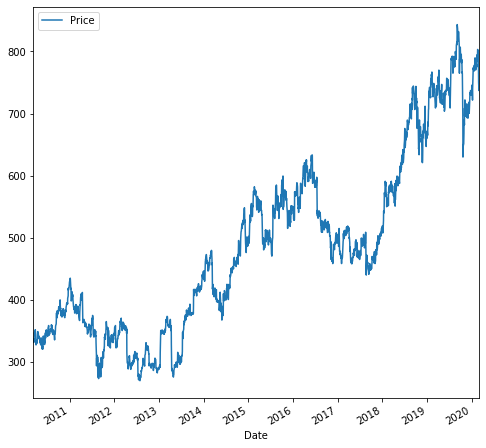

In [23]:

dta.plot(figsize=(8,8))
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [0]:

#split into test and train
percentage = 0.6
series = dta['Price'].tolist()
size = int(len(series) * 0.80)
train, test = series[0:size], series[size:len(series)]
model = ARIMA(train , order = (2,1,0))
model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


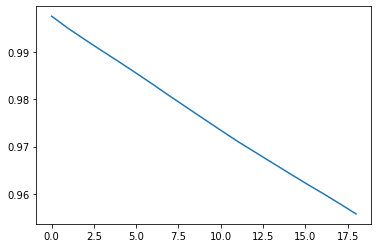

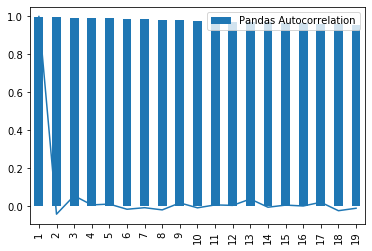

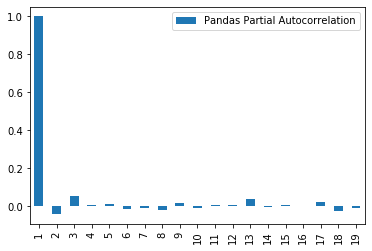

In [25]:
from statsmodels.tsa.stattools import acf, pacf
acf_1 = acf(series)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 = pacf(series)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
#from the figures we conclude that it is an AR process with a lag of 8-9

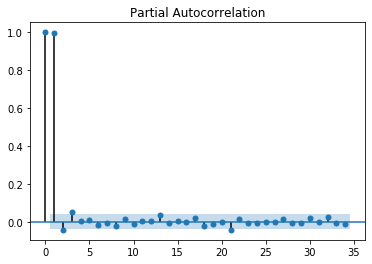

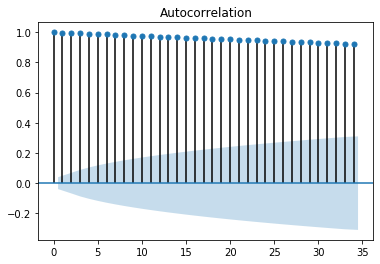

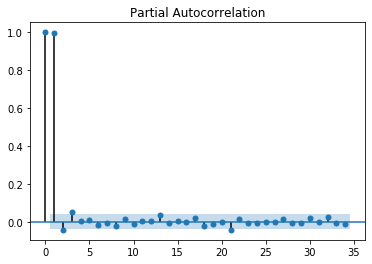

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dta)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dta)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.recurrent import LSTM

In [28]:
"""
Arima Rolling Forecast
"""
predicted1, resid_test = [], []
history = train
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    resid_test.append(test[t] - output[0])
    predicted1.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
test_resid = []
for i in resid_test:
    test_resid.append(i[0])
error = mean_squared_error(test, predicted1)
print('Test MSE: %.3f' % error)


predicted=574.103400, expected=584.799988
predicted=584.815615, expected=580.375000
predicted=579.874180, expected=581.275024
predicted=581.667303, expected=577.500000
predicted=577.595329, expected=574.500000
predicted=574.866035, expected=581.174988
predicted=581.456965, expected=588.000000
predicted=587.712460, expected=590.099976
predicted=589.824993, expected=590.000000
predicted=590.013975, expected=590.000000
predicted=590.144116, expected=591.000000
predicted=591.134785, expected=582.000000
predicted=582.109903, expected=574.299988
predicted=574.989039, expected=585.000000
predicted=585.557153, expected=582.250000
predicted=581.752860, expected=573.500000
predicted=573.833081, expected=583.450012
predicted=584.070899, expected=580.000000
predicted=579.545357, expected=575.375000
predicted=575.741075, expected=570.500000
predicted=570.934590, expected=567.349976
predicted=567.787997, expected=572.000000
predicted=572.297718, expected=569.775024
predicted=569.629158, expected=571

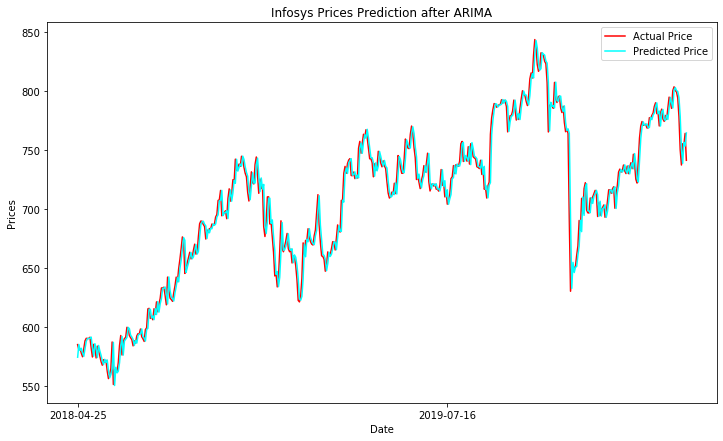

In [29]:
plt.figure(figsize=(12,7))
plt.plot(test, color= 'red', label='Actual Price')
plt.plot(predicted1 , color = 'cyan', label='Predicted Price')
plt.title('Infosys Prices Prediction after ARIMA')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,500, 300), df['Date'][2014:2518:300])
plt.legend()

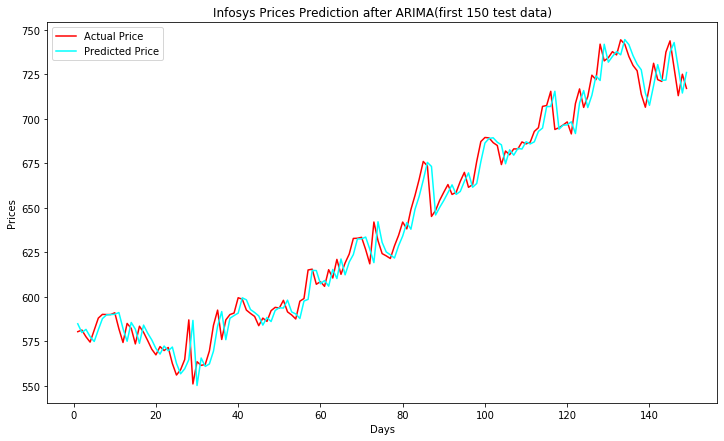

In [30]:
plt.figure(figsize=(12,7))
Y = pd.DataFrame(test)[1:150]
pred = pd.DataFrame(predicted1)[1:150]
plt.plot(Y, color= 'red', label='Actual Price')
plt.plot(pred , color = 'cyan', label='Predicted Price')
plt.title('Infosys Prices Prediction after ARIMA(first 150 test data)')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1978
Model:                     ARMA(1, 0)   Log Likelihood               -6662.866
Method:                       css-mle   S.D. of innovations              7.016
Date:                Thu, 12 Mar 2020   AIC                          13331.732
Time:                        16:27:37   BIC                          13348.501
Sample:                             0   HQIC                         13337.892
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.4949     53.300      8.171      0.000     331.029     539.961
ar.L1.y        0.9975      0.002    655.734      0.000       0.995       1.000
                                    Roots           

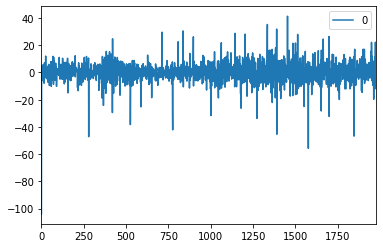

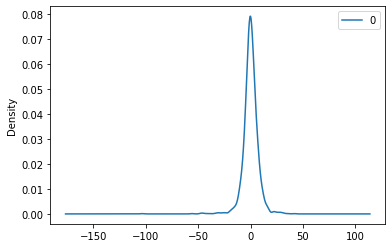

                 0
count  1978.000000
mean      0.052468
std       7.394446
min    -103.869856
25%      -3.185178
50%      -0.015828
75%       3.453038
max      41.244026


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


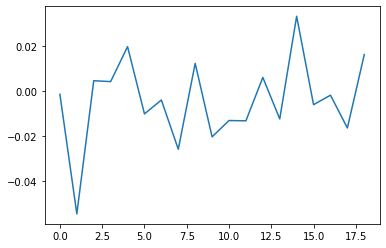

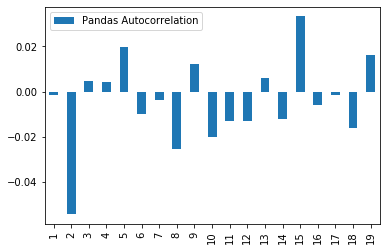

In [31]:
"""
Residual Diagnostics
"""
train, test = series[0:size], series[size:len(series)]
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
#plot the acf for the residuals
acf_1 = acf(model_fit.resid)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
#from the acf obtained from the residuals we concule that 
#there is still a nonlinear relationship among the residuals

In [32]:
"""
Hybrid Model
"""
window_size = 50
def make_model(window_size):
    model = Sequential()
    model.add(Dense(50, input_dim=window_size, init="uniform",
    activation="tanh"))
    model.add(Dense(10, init="uniform", activation="tanh"))
    model.add(Dense(1))
    model.add(Activation("linear"))
    model.compile(loss='mean_squared_error', optimizer='Adadelta')
    return model

#def make_lstm_model():
#   model = Sequential()
#   model.add(LSTM(
#        input_dim=1,
#        output_dim=50,
#        return_sequences=True))
#   model.add(Dropout(0.2))
#   model.add(LSTM(
#        100,
#        return_sequences=False))
#   model.add(Dropout(0.2))

#   model.add(Dense(
#        output_dim=1))
#   model.add(Activation("linear"))
#   model.compile(loss="mse", optimizer="rmsprop")
#   return model

model = make_model(50)
#lstm_model = make_lstm_model()
min_max_scaler = preprocessing.MinMaxScaler()
train = np.array(train).reshape(-1,1)

train_scaled = min_max_scaler.fit_transform(test_data) 

train_X,train_Y = [],[]
for i in range(0 , len(train_scaled) - window_size):
    train_X.append(train_scaled[i:i+window_size])
    train_Y.append(train_scaled[i+window_size])

new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
#new_train_X = np.reshape(new_train_X, (new_train_X.shape[0], new_train_X.shape[1], 1))
model.fit(new_train_X,new_train_Y, nb_epoch=500, batch_size=512, validation_split = .05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=50, activation="tanh", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="tanh", kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 470 samples, validate on 25 samples
Epoch 1/500
470/470 [==============================] - 0s 559us/step - loss: 0.0167 - val_loss: 0.0090
Epoch 2/500
470/470 [==============================] - 0s 7us/step - loss: 0.0093 - val_loss: 0.0055
Epoch 3/500
470/470 [==============================] - 0s 10us/step - loss: 0.0056 - val_loss: 0.0035
Epoch 4/500
470/470 [==============================] - 0s 10us/step - loss: 0.0040 - val_loss: 0.0025
Epoch 5/500
470/470 [==============================] - 0s 14us/step - loss: 0.0033 - val_loss: 0.0020
Epoch 6/500
470/470 [==============================] - 0s 7us/step - loss: 0.0029 - val_loss: 0.0017
Epoch 7/500
470/470 [==============================] - 0s 7us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 8/500
470/470 [==============================] - 0s 7us/step - loss: 0.0023 - val_loss: 0.0013
Epoch 9/500
470/470 [==============================] - 0s 8us/step - loss: 0.0020 - val_loss: 0.0011
Epoch 10/500
470/470 [===================

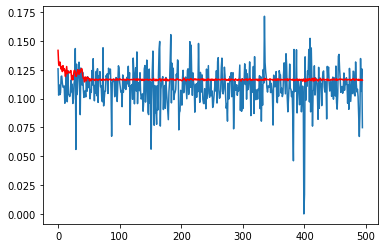

Test MSE: 139.759


In [33]:
test_extended = train.tolist()[-1*window_size:] + test_resid
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
test_scaled = min_max_scaler.fit_transform(test_data)
test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])
    new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
#new_test_X = np.reshape(new_test_X, (new_test_X.shape[0], new_test_X.shape[1], 1))
predictions = model.predict(new_train_X)
predictions_rescaled=min_max_scaler.inverse_transform(predictions)
Y = pd.DataFrame(new_train_Y)
pred = pd.DataFrame(predictions)
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_resid,predictions_rescaled)
print('Test MSE: %.3f' % error)

In [34]:
print(len(new_train_X))

495


In [0]:
from sklearn.metrics import mean_absolute_error   #MAE
from sklearn.metrics import mean_squared_error as mse   #MSE

def parser(x):
    return datetime.strptime(x,'%Y-%m')

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())  #RMSE

def RMSLE(predict, target):                   #Root Mean Squared Logarithmic Error
    total = 0 
    for k in range(len(predict)):
        LPred= np.log1p(predict[k]+1)
        LTarg = np.log1p(target[k] + 1)
        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): 
            total = total + ((LPred-LTarg) **2)
        
    total = total / len(predict)        
    return np.sqrt(total)

def mean_absolute_percentage_error(y_true, y_pred): #MAPE
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))  #Symmetric Mean Absolute Percentage Error (SMAPE)

In [36]:
pred_final = predictions_rescaled + predicted1
error = mean_absolute_error(test,pred_final)
print('Test MSE: %.3f' % error)

Test MSE: 8.678


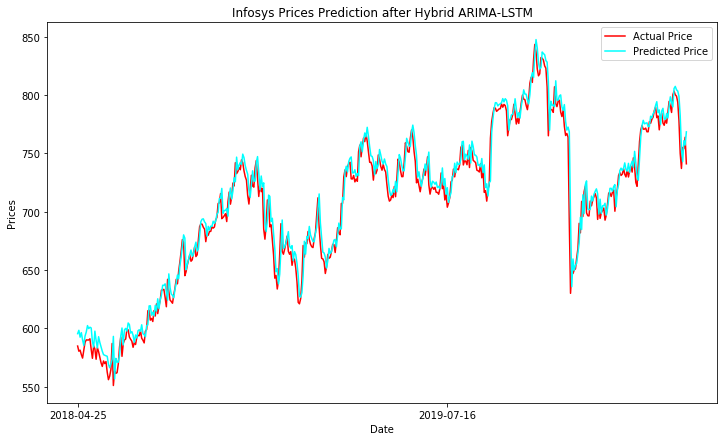

In [37]:
plt.figure(figsize=(12,7))
Y = pd.DataFrame(test)
pred = pd.DataFrame(pred_final)
plt.plot(Y, color= 'red', label='Actual Price')
plt.plot(pred , color = 'cyan', label='Predicted Price')
plt.title('Infosys Prices Prediction after Hybrid ARIMA-LSTM')
#p.plot()
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,500, 300), df['Date'][2014:2518:300])
plt.legend()

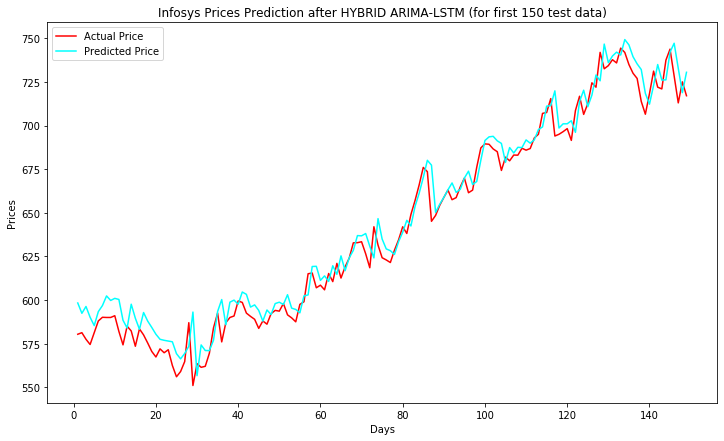

In [38]:
plt.figure(figsize=(12,7))
Y = pd.DataFrame(test)[1:150]
pred = pd.DataFrame(pred_final)[1:150]
plt.plot(Y, color= 'red', label='Actual Price')
plt.plot(pred , color = 'cyan', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Infosys Prices Prediction after HYBRID ARIMA-LSTM (for first 150 test data)')
plt.legend()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


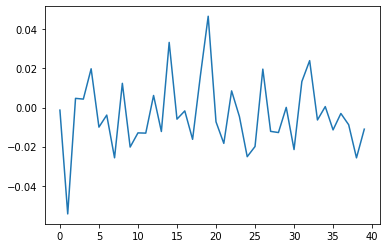

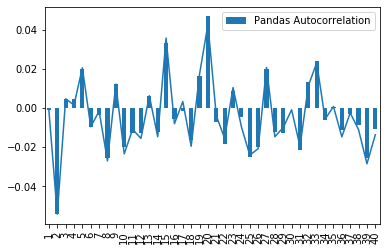

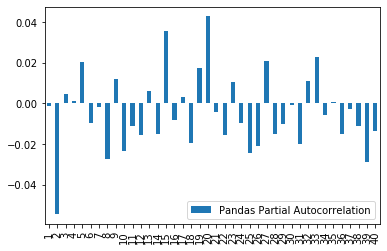

In [39]:
from statsmodels.tsa.stattools import acf, pacf
acf_2 = acf(model_fit.resid)[1:100]
plt.plot(acf_2)
test_df = pd.DataFrame([acf_2]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
pacf_2 = pacf(model_fit.resid)[1:100]
plt.plot(pacf_2)
plt.show()
test_df = pd.DataFrame([pacf_2]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
#from the figures we conclude that it is an AR process with a lag of 8-9

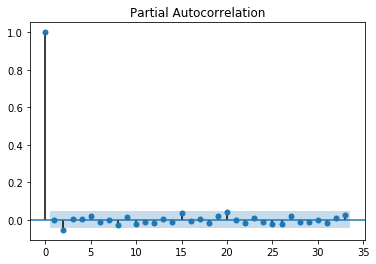

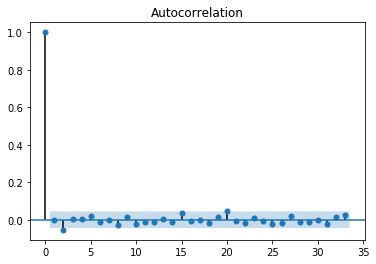

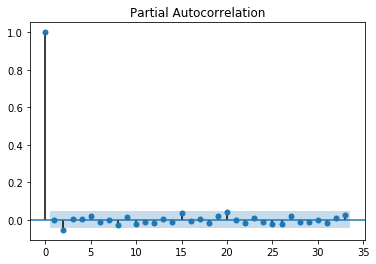

In [40]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(model_fit.resid)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(model_fit.resid)

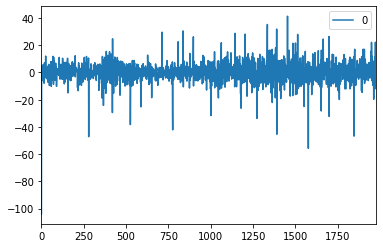

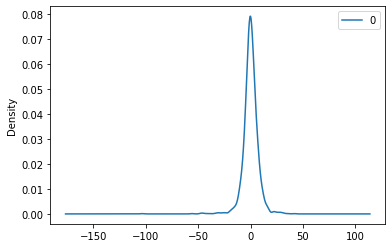

In [41]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [42]:
import math
error = mean_squared_error(test,pred_final)
print('MSE: %.3f' % error)

error = mean_absolute_error(test,pred_final)
print('MAE: %.3f' % error)

error = rmse(test,pred_final)
print('RMSE: %.3f' % error)

error = RMSLE(test,pred_final)
print('RMSLE: %.3f' % error)

error = mean_absolute_percentage_error(test,pred_final)
print('MAPE: %.3f' % error)

error2 = smape_kun(test,pred_final)
print('SMAPE: %.3f' % error2)

MSE: 139.759
MAE: 8.678
RMSE: 92.189
RMSLE: 0.017
MAPE: 0.107
SMAPE: 10.572
